In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Analyse et correction du dataset

### Lecture du fichier

In [55]:
data = pd.read_csv('heart.csv', delimiter=';')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0.0,Normal,172.0,N,0.0,Up,0.0
1,49,F,NAP,160.0,180.0,0.0,Normal,156.0,N,1.0,Flat,1.0
2,37,M,ATA,130.0,283.0,0.0,ST,98.0,N,0.0,Up,0.0
3,48,F,ASY,138.0,214.0,0.0,Normal,108.0,Y,1.5,Flat,1.0
4,54,M,NAP,150.0,195.0,0.0,Normal,122.0,N,0.0,Up,0.0


In [56]:
df = data.copy()

#### Dimension du dataset

In [57]:
df.shape

(919, 12)

### Types et valeurs manquantes par variable

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919 entries, 0 to 918
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             919 non-null    int64  
 1   Sex             919 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    float64
 4   Cholesterol     918 non-null    float64
 5   FastingBS       918 non-null    float64
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    float64
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    float64
dtypes: float64(6), int64(1), object(5)
memory usage: 86.3+ KB


In [59]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     1
RestingBP         1
Cholesterol       1
FastingBS         1
RestingECG        1
MaxHR             1
ExerciseAngina    1
Oldpeak           1
ST_Slope          1
HeartDisease      1
dtype: int64

Observations : 
 - Une ligne semble avoir des valeur nulle
 - HeartDisease et FastingBS ne sont pas au bon format

### Identification et suppression de la ligne "null"

In [60]:
df[df['ChestPainType'].isna()]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
793,54,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
df = df.drop(793)

In [62]:
df.shape

(918, 12)

In [63]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

### Changement du type de HeartDisease et FastingBS en object

In [64]:
df['FastingBS'] = df['FastingBS'].astype(int).astype(object)
df['HeartDisease'] = df['HeartDisease'].astype(int).astype(object)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 918 entries, 0 to 918
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    float64
 4   Cholesterol     918 non-null    float64
 5   FastingBS       918 non-null    object 
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    float64
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 93.2+ KB


In [66]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172.0,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156.0,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98.0,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108.0,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122.0,N,0.0,Up,0


### Distribution variable cible

In [67]:
df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

Observation : la classe est équilibré

### Analyse univarié variable quanti

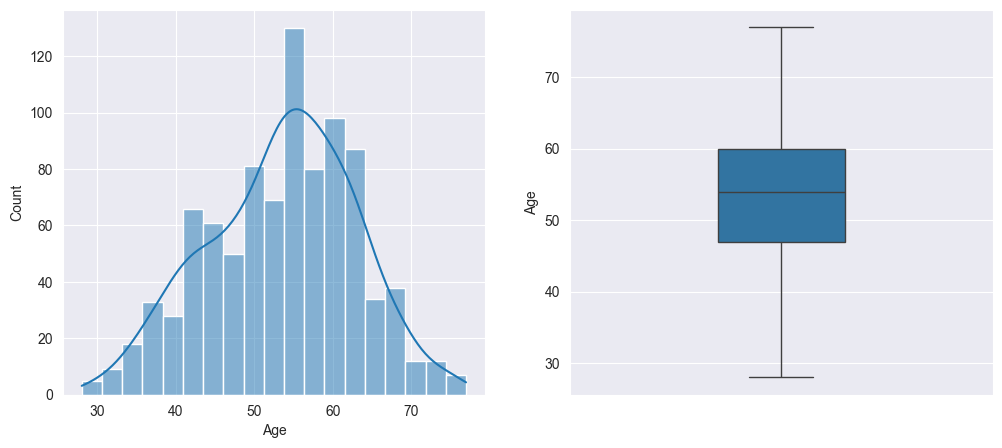

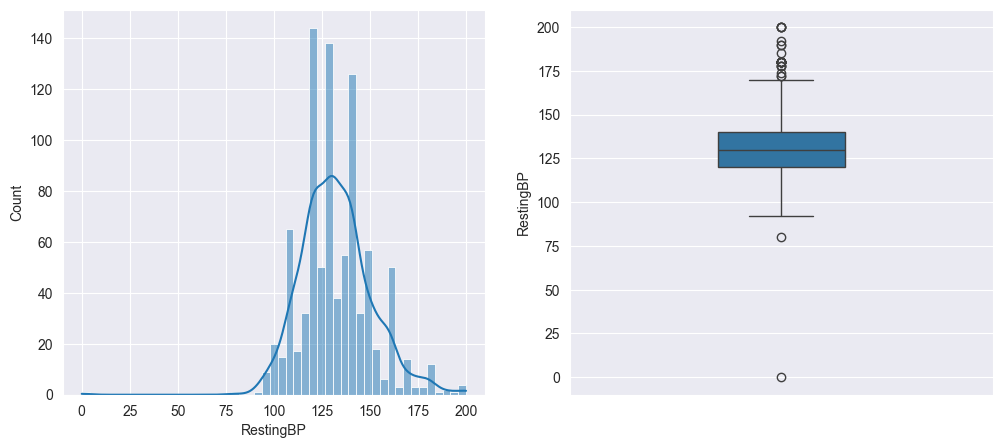

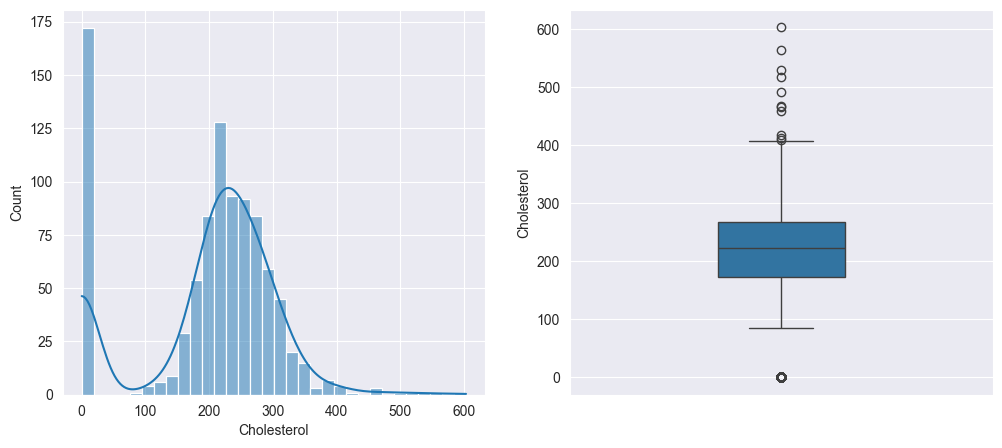

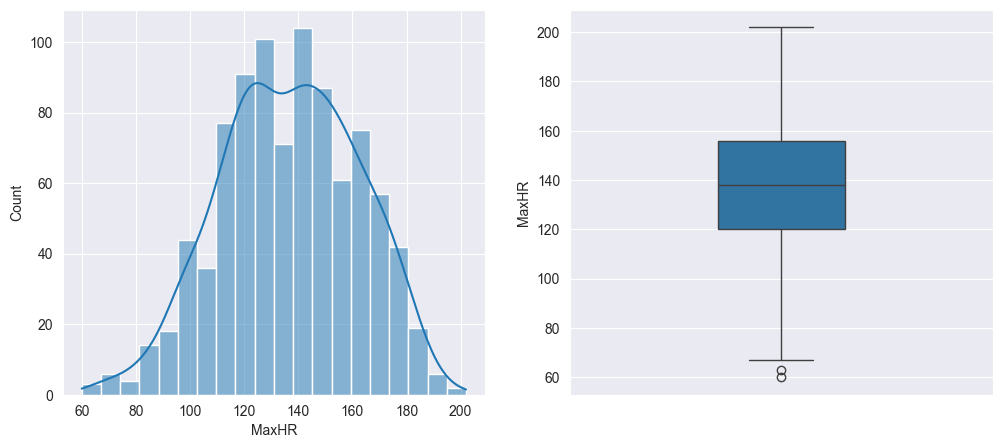

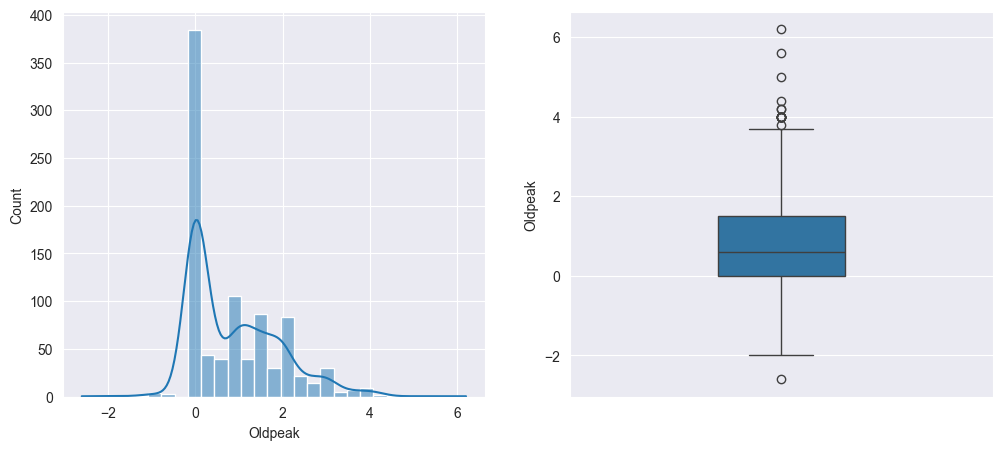

In [68]:
import seaborn as sns

for col in df.select_dtypes(['float64','int64']):
    plt.figure(figsize=(12,5))

    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True, edgecolor=None)

    plt.subplot(1,2,2)
    sns.boxplot(df[col], width= 0.3)

Osbervations :
 - Toutes les distributions suivent des lois normales
 - Une valeur à 0 pour RestingBP : oublier ? Valeur nulle ?
 - ~ 20% de valeur à 0 pour Choolesterol => impossible ce sont des valeurs nulles

### Remplacer les 0 par des valeurs nulles pour la variable Cholesterol

In [69]:
df['Cholesterol'].loc[df['Cholesterol'] == 0] = None

/var/folders/1c/70ngsvd53b5fbc_qfg773ckc0000gn/T/ipykernel_23237/2212974269.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cholesterol'].loc[df['Cholesterol'] == 0] = None


In [70]:
df.isnull().sum()

Age                 0
Sex                 0
ChestPainType       0
RestingBP           0
Cholesterol       172
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak             0
ST_Slope            0
HeartDisease        0
dtype: int64

### Identifier la ligne où RestingBP est null

In [71]:
df[df['RestingBP'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0.0,NaN,0,Normal,155.0,N,1.5,Flat,1


Pas de valeur aberantes, on décide de remplacer la valeur par 0 plutot que de supprimer la ligne

In [72]:
df['RestingBP'].loc[df['RestingBP'] == 0] = None

/var/folders/1c/70ngsvd53b5fbc_qfg773ckc0000gn/T/ipykernel_23237/4267426226.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RestingBP'].loc[df['RestingBP'] == 0] = None


In [73]:
df.isnull().sum()

Age                 0
Sex                 0
ChestPainType       0
RestingBP           1
Cholesterol       172
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak             0
ST_Slope            0
HeartDisease        0
dtype: int64

### Analyse univarié quali

In [74]:
for col in df.select_dtypes('object'):
    print(f'{col :-<20} {df[col].unique()}')

Sex----------------- ['M' 'F' 'Male' 'Female']
ChestPainType------- ['ATA' 'NAP' 'ASY' 'TA']
FastingBS----------- [0 1]
RestingECG---------- ['Normal' 'ST' 'LVH']
ExerciseAngina------ ['N' 'Y']
ST_Slope------------ ['Up' 'Flat' 'Down']
HeartDisease-------- [0 1]


Observations : 
 - La variable Sex est mal configurée

In [75]:
df['Sex'].value_counts()

Sex
M         722
F         192
Male        3
Female      1
Name: count, dtype: int64

### Reconfiguration de la variable Sex

In [76]:
df['Sex'] = df['Sex'].replace(['Male','Female'], ['M','F'])

In [77]:
df['Sex'].value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

### Affichage graphique variable qualitative

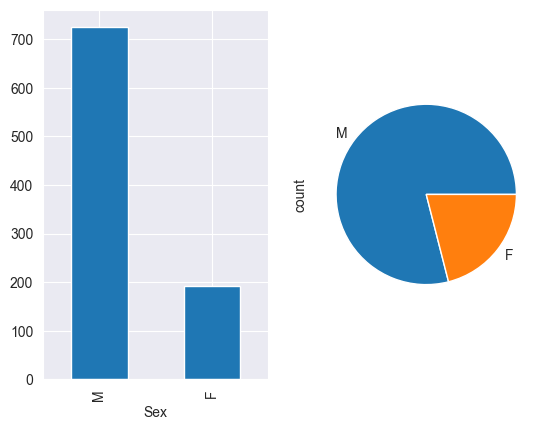

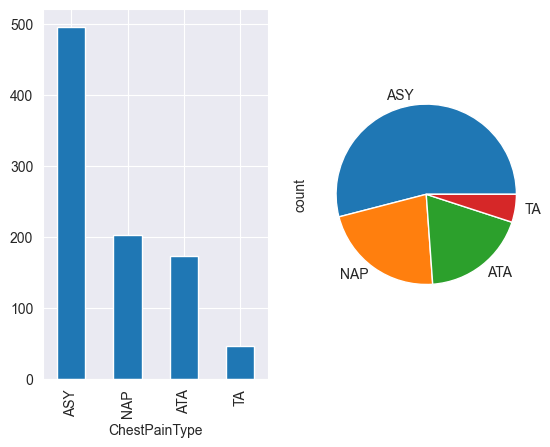

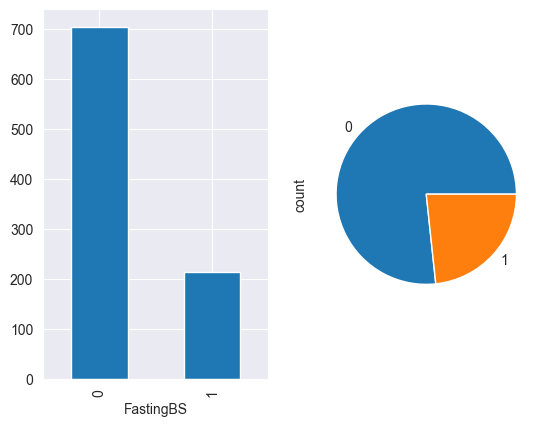

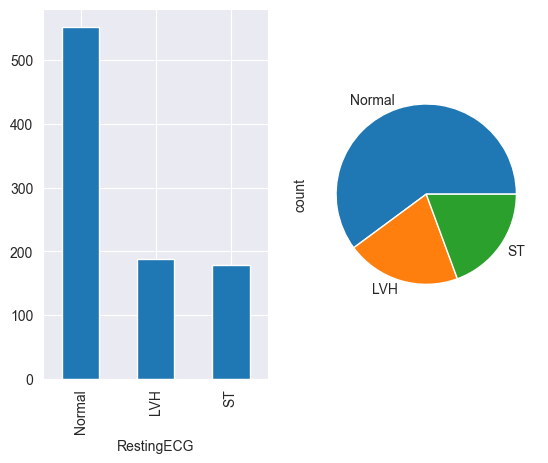

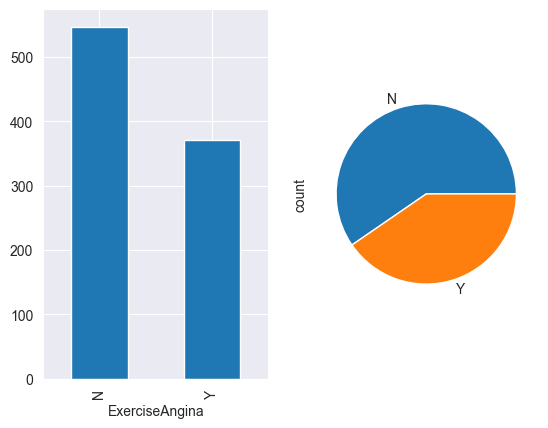

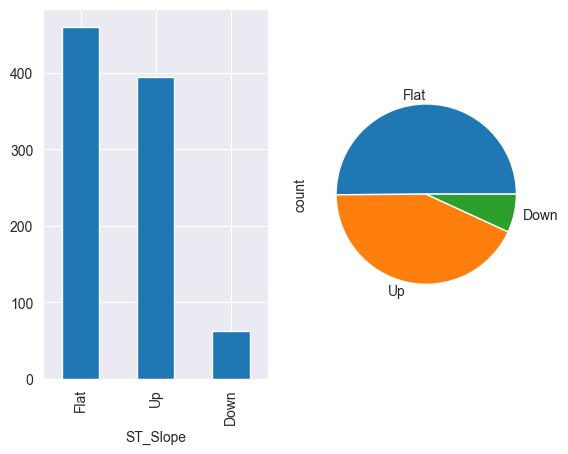

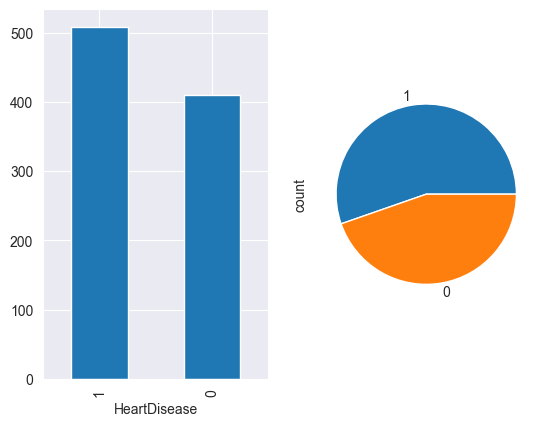

In [78]:
for col in df.select_dtypes('object') :
    plt.figure()
    
    plt.subplot(1,2,1)
    df[col].value_counts().plot(kind='bar')
    
    plt.subplot(1,2,2)
    df[col].value_counts().plot.pie()

Observations :
 - 'TA' de ChestPainTyep : peu de valeurs
 - 'Down' de ST_Slope : peu de valeurs

### Analyse bivariée

### Variables numériques

In [79]:
positive_df = df[df['HeartDisease'] == 1]
negative_df = df[df['HeartDisease'] == 0]

In [80]:
positive_df['HeartDisease'].value_counts()

HeartDisease
1    508
Name: count, dtype: int64

In [81]:
negative_df['HeartDisease'].value_counts()

HeartDisease
0    410
Name: count, dtype: int64

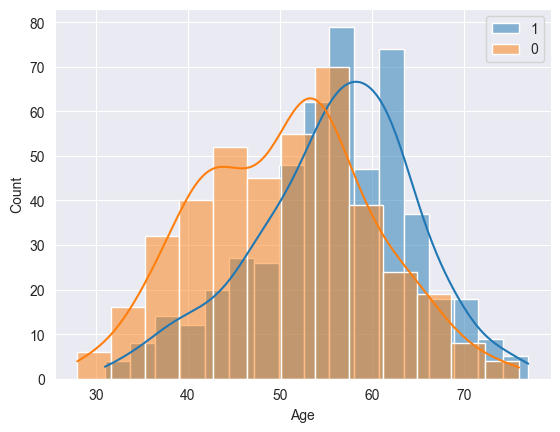

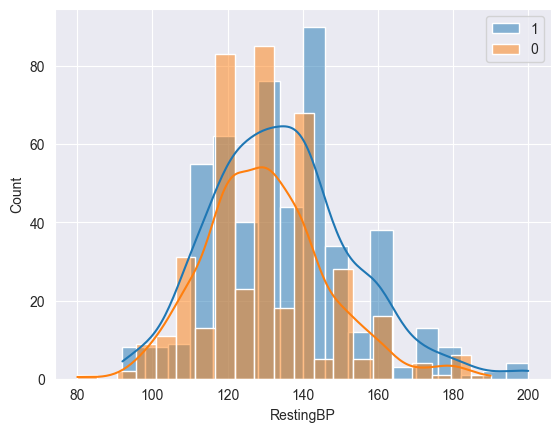

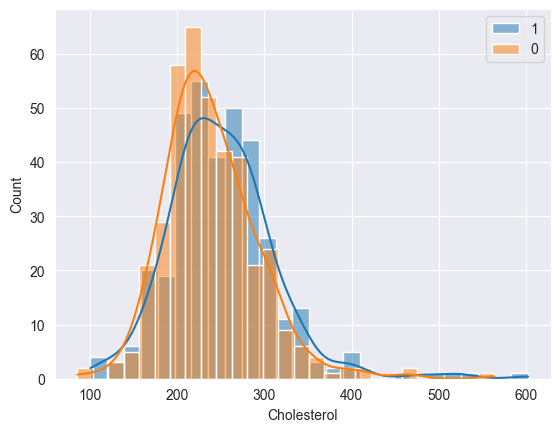

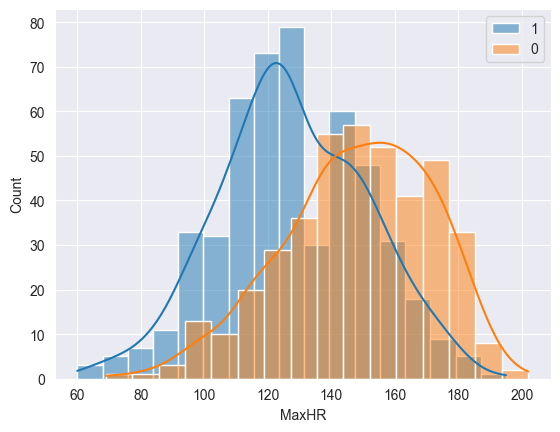

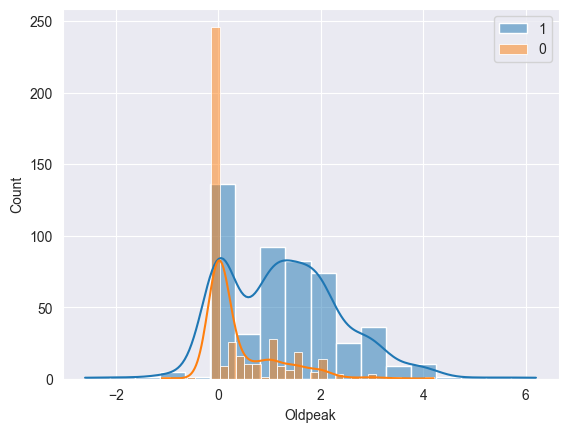

In [82]:
for col in positive_df.select_dtypes(['float64','int64']):

    sns.histplot(positive_df[col], label = '1', kde=True, edgecolor=None)
    sns.histplot(negative_df[col], label = '0', kde=True, edgecolor=None)
    
    plt.legend()
    plt.show()


Observations :
 - Les distributions de Age, MaxHr, Oldpeak semble significativement différente

### Analyse bivarié variable qualitative

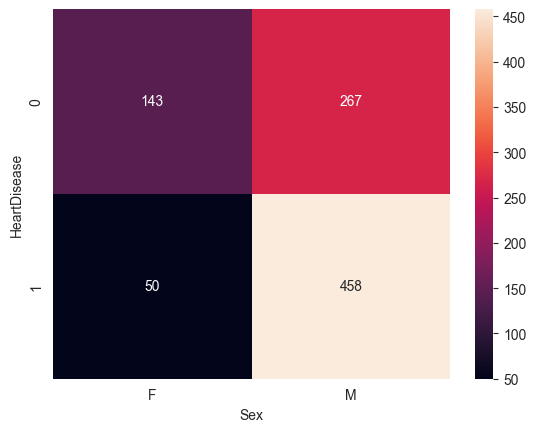

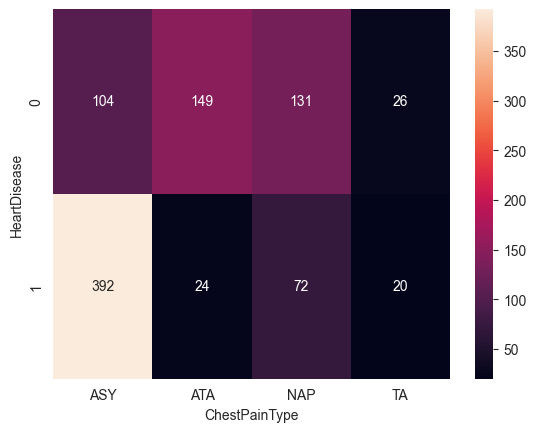

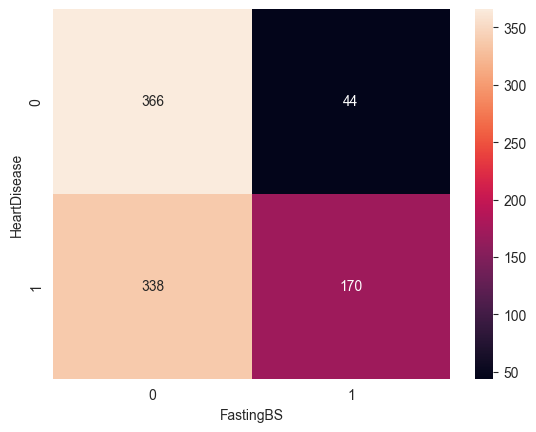

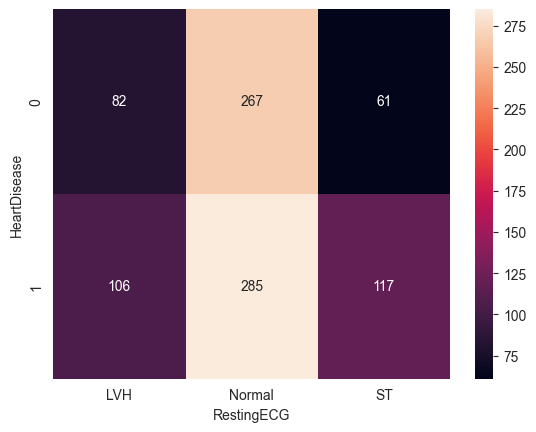

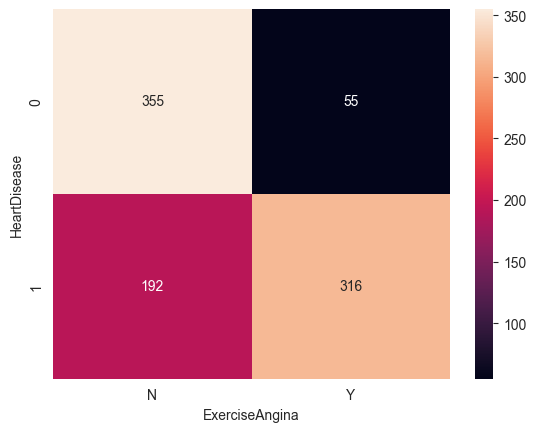

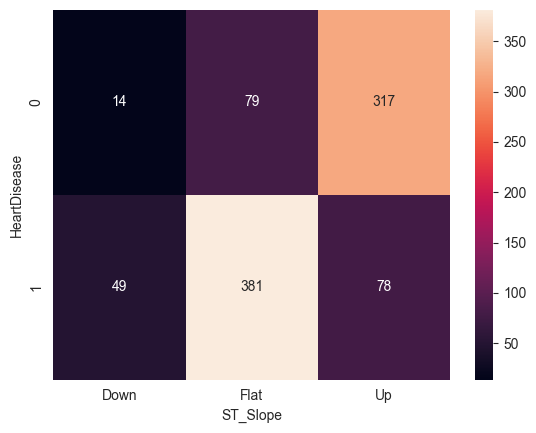

In [83]:
for col in df.drop('HeartDisease', axis=1).select_dtypes('object'):
    
    plt.figure()
    sns.heatmap(pd.crosstab(df['HeartDisease'], df[col]), annot=True, fmt='d')

Observations :
 - ChestPainType TA : peu de valeurs et ne semble pas significative
 - FastingBS 0 : beaucoup de valeurs mais ne semble pas significative
 - RestingECG Normal : beaucoup de valeurs mais ne semble pas significative
 - ST_Slope Down : peu de valeurs et ne semble pas significative
 - ST_Slope Flat et Up, ExerciseAngina Yes : semble être les plus significatives

## Preprocessing

### Train - test split

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
trainset, testset = train_test_split(df, test_size=0.2, random_state=0)

In [86]:
trainset['HeartDisease'].value_counts()

HeartDisease
1    401
0    333
Name: count, dtype: int64

In [87]:
testset['HeartDisease'].value_counts()

HeartDisease
1    107
0     77
Name: count, dtype: int64

### Encodage

In [88]:
df_encoded = pd.get_dummies(df, columns=list(df.drop('HeartDisease',axis=1).select_dtypes('object').columns), dtype=int)

In [89]:
df_encoded.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,FastingBS_0,FastingBS_1,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140.0,289.0,172.0,0.0,0,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
1,49,160.0,180.0,156.0,1.0,1,1,0,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130.0,283.0,98.0,0.0,0,0,1,0,1,...,1,0,0,0,1,1,0,0,0,1
3,48,138.0,214.0,108.0,1.5,1,1,0,1,0,...,1,0,0,1,0,0,1,0,1,0
4,54,150.0,195.0,122.0,0.0,0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,1


In [90]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 918 entries, 0 to 918
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          917 non-null    float64
 2   Cholesterol        746 non-null    float64
 3   MaxHR              918 non-null    float64
 4   Oldpeak            918 non-null    float64
 5   HeartDisease       918 non-null    object 
 6   Sex_F              918 non-null    int64  
 7   Sex_M              918 non-null    int64  
 8   ChestPainType_ASY  918 non-null    int64  
 9   ChestPainType_ATA  918 non-null    int64  
 10  ChestPainType_NAP  918 non-null    int64  
 11  ChestPainType_TA   918 non-null    int64  
 12  FastingBS_0        918 non-null    int64  
 13  FastingBS_1        918 non-null    int64  
 14  RestingECG_LVH     918 non-null    int64  
 15  RestingECG_Normal  918 non-null    int64  
 16  RestingECG_ST      918 non-null

### Création d'une fonction de preprocessing à appliquer sur notre trainset et testset

In [91]:
def preprocessing(df):
    
    #encodage
    df = pd.get_dummies(df, columns=list(df.drop('HeartDisease',axis=1).select_dtypes('object').columns), dtype=int)
    df['HeartDisease'] = df['HeartDisease'].astype('int')
    
    #gestion des valeurs manquantes
    df = df.dropna()
    
    #division variables explicatives et variable cible    
    X = df.drop('HeartDisease', axis=1)
    y = df['HeartDisease']
    
    return X, y

In [92]:
X_train, y_train = preprocessing(trainset)
X_test, y_test = preprocessing(testset)

In [93]:
X_train.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,...,FastingBS_0,FastingBS_1,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
738,65,160.0,360.0,151.0,0.8,1,0,0,0,1,...,1,0,1,0,0,1,0,0,0,1
85,66,140.0,139.0,94.0,1.0,0,1,1,0,0,...,1,0,0,1,0,0,1,0,1,0
75,46,150.0,163.0,116.0,0.0,0,1,0,0,1,...,1,0,0,1,0,1,0,0,0,1
681,51,140.0,261.0,186.0,0.0,0,1,1,0,0,...,1,0,1,0,0,0,1,0,0,1
698,41,130.0,214.0,168.0,2.0,0,1,0,0,1,...,1,0,1,0,0,1,0,0,1,0


## Construction du premier modèle

In [94]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=0)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [95]:
len(y_pred)

145

## Evaluation du premier modèle

In [96]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[62 12]
 [25 46]]


### Classification report

In [97]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.84      0.77        74
           1       0.79      0.65      0.71        71

    accuracy                           0.74       145
   macro avg       0.75      0.74      0.74       145
weighted avg       0.75      0.74      0.74       145


### Learning curve

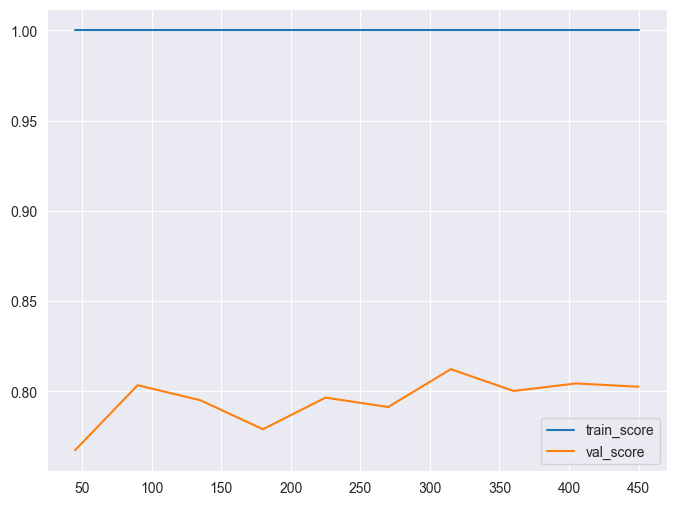

In [98]:
from sklearn.model_selection import learning_curve

N, train_score, val_score =learning_curve(model, X_train, y_train, cv=4, scoring='f1', train_sizes=np.linspace(0.1,1,10))

plt.figure(figsize=(8,6))

plt.plot(N,train_score.mean(axis=1), label = 'train_score')
plt.plot(N,val_score.mean(axis=1), label = 'val_score')
plt.legend()

### Correlation des variables

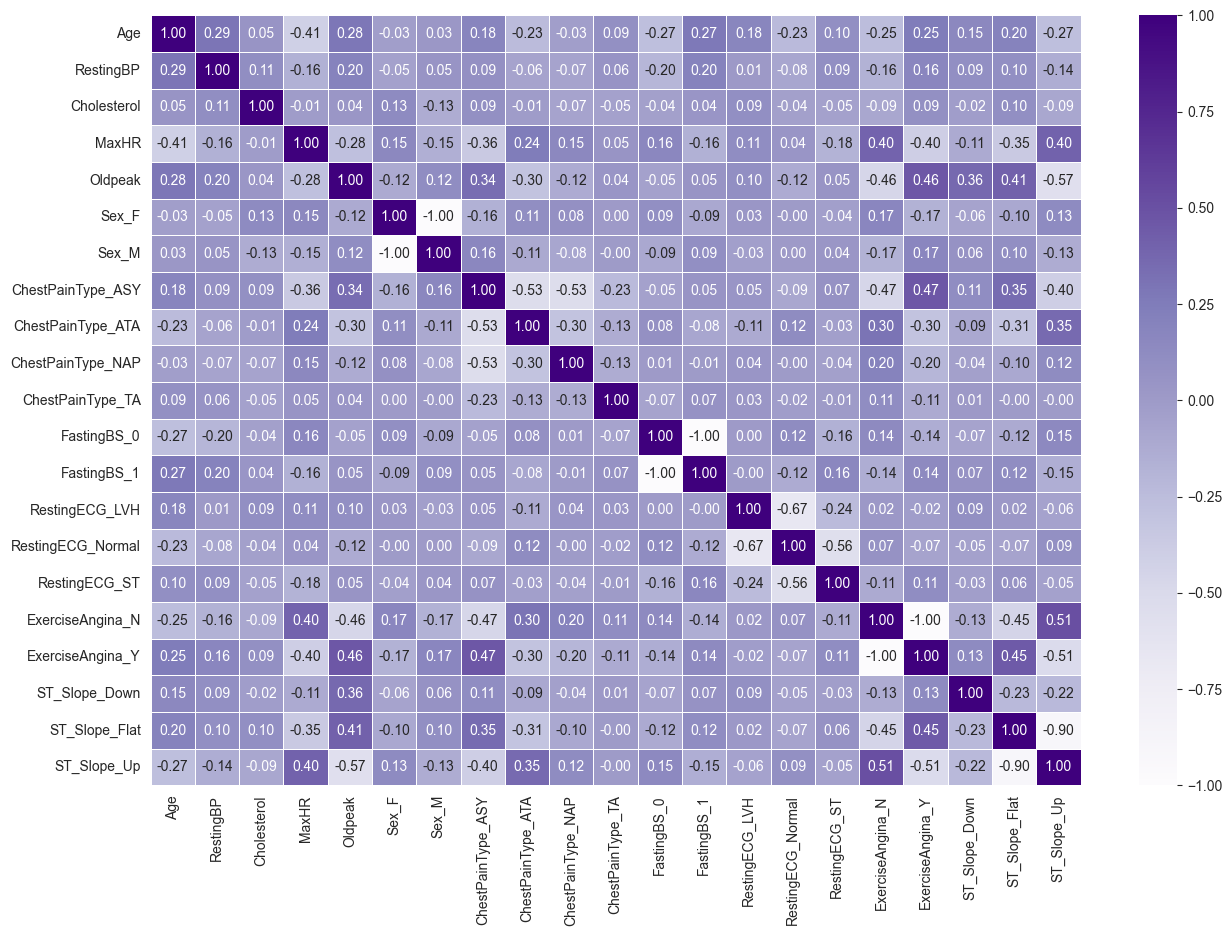

In [99]:
corr_mat = X_train.corr()

fig, ax= plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_mat, annot=True, linewidths=0.5, fmt='0.2f', cmap='Purples')

### On supprime Sex_F, FastingBS_0, ExerciceAngina_N, ST_Slope_Flat

## Variance des variables

In [100]:
X_train.var(axis=0)

Age                    88.718014
RestingBP             295.386378
Cholesterol          3428.694354
MaxHR                 623.327160
Oldpeak                 1.117817
Sex_F                   0.183361
Sex_M                   0.183361
ChestPainType_ASY       0.250261
ChestPainType_ATA       0.177188
ChestPainType_NAP       0.177188
ChestPainType_TA        0.050494
FastingBS_0             0.127537
FastingBS_1             0.127537
RestingECG_LVH          0.173539
RestingECG_Normal       0.238519
RestingECG_ST           0.140044
ExerciseAngina_N        0.237022
ExerciseAngina_Y        0.237022
ST_Slope_Down           0.050494
ST_Slope_Flat           0.249750
ST_Slope_Up             0.249662
dtype: float64

### On supprime ChestPainType_TA, ST_Slope_Down

## fonction d'apprentissage et d'évaluation

In [101]:
from sklearn.preprocessing import StandardScaler

def preprocessing(df):
    
    #encodage
    df = pd.get_dummies(df, columns=list(df.drop('HeartDisease',axis=1).select_dtypes('object').columns), dtype=int)
    df['HeartDisease'] = df['HeartDisease'].astype('int')
    
    #feature selection
    df = df.drop(['Sex_F', 'FastingBS_0', 'ExerciseAngina_N', 'ST_Slope_Flat', 'ChestPainType_TA', 'ST_Slope_Down'], axis=1)
    #df = df[['ST_Slope_Up', 'MaxHR', 'Oldpeak', 'ChestPainType_ASY', 'Cholesterol','RestingBP', 'Age','HeartDisease']]
    
    #gestion des valeurs manquantes
    #df = df.dropna()
    df = df.fillna(df.mean())
    
    #division variables explicatives et variable cible    
    X = df.drop('HeartDisease', axis=1)
    y = df['HeartDisease']
    
    #Standardisation
    X = StandardScaler().fit_transform(X)
    
    return X, y

In [102]:
def evaluation(model, X_train, y_train, X_test, y_test):
    #entrainement
    model.fit(X_train, y_train)

    #prediction
    y_prod = model.predict(X_test)

    #evaluation
    print(confusion_matrix(y_test, y_prod))
    
    print(classification_report(y_test, y_prod))
    
    #learning
    N, train_score, val_score =learning_curve(model, X_train, y_train, cv=4, scoring='f1', train_sizes=np.linspace(0.1,1,10))
    plt.figure(figsize=(8,6))

    plt.plot(N,train_score.mean(axis=1), label = 'train_score')
    plt.plot(N,val_score.mean(axis=1), label = 'val_score')
    plt.legend()

In [103]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=0)

[[60 17]
 [10 97]]
              precision    recall  f1-score   support

           0       0.86      0.78      0.82        77
           1       0.85      0.91      0.88       107

    accuracy                           0.85       184
   macro avg       0.85      0.84      0.85       184
weighted avg       0.85      0.85      0.85       184


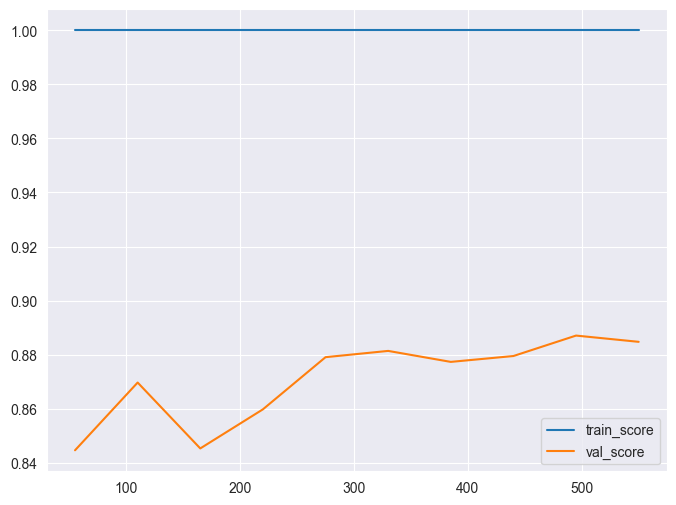

In [104]:
X_train, y_train = preprocessing(trainset)
X_test, y_test = preprocessing(testset)

evaluation(model, X_train, y_train, X_test, y_test)

In [105]:
pd.DataFrame(model.feature_importances_, index=X_train.columns).sort_values(by=0, ascending=False).plot.bar(color='purple')

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [106]:
pd.DataFrame(model.feature_importances_, index=X_train.columns).sort_values(by=0, ascending=False).index

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

### feature selection par test statistique

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

X_train, y_train = preprocessing(trainset)
X_test, y_test = preprocessing(testset)

selector = SelectKBest(score_func=f_classif, k=12)

X_train = selector.fit_transform(X_train, y_train)
X_test = selector.transform(X_test)

evaluation(model, X_train, y_train, X_test, y_test)

In [ ]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(SelectKBest(f_classif),RandomForestClassifier(random_state=0))

In [ ]:
model.get_params()

In [ ]:
#hyper_param = {'selectkbest__k' : list(range(10,15)), 'randomforestclassifier__max_depth': [None, 3, 5, 10]}
hyper_param = {'selectkbest__k' : list(range(10,15)), 'svc__c' : [1,10,100,1000], 'svc__gamma' :('scale', 1e-3, 1e-4)}

### grid search cv

In [ ]:
from sklearn.model_selection import GridSearchCV

X_train, y_train = preprocessing(trainset)
X_test, y_test = preprocessing(testset)

grid = GridSearchCV(model, hyper_param, scoring='f1', cv=4)

grid.fit(X_train, y_train)

y_pred = grid.predict(X_test)

print(classification_report(y_test, y_pred))


In [ ]:
grid.best_params_